## 土地資料
> https://plvr.land.moi.gov.tw/DownloadOpenData


In [4]:
import pandas as pd

S1_106 = pd.read_csv('./106to108/106_S1_F_lvr_land_A.csv', index_col=False, error_bad_lines=False)
S1_106 = S1_106.drop(S1_106.index[0])
# S1_106.isnull().sum()

In [6]:
col_name = ['district', 'sign', 'address', 'square', 'zone', 'n1', 'n2' , 'date', 'stuff' , 'level', 'floor', 'state', 'use', 'material', 'complete', 'area', 'room', 'hall', 'health', 'compartmented', 'manage', 'price', 'square price', 'park', 'park_size', 'park_price', 'note', 'sId']

landDF = pd.DataFrame()
# 自訂顯示幾個feature
# pd.set_option('display.max_columns', 30)
landDF

""


In [7]:
for j in range(106, 108):
    # 取得 a-x檔案內的資料
    for i in range(1, 5):
        try:
            temp = pd.read_csv('./106to108/' + str(j) + '_S' + str(i) + '_F_lvr_land_A.csv', header=None)
            temp = temp.drop(temp.index[[0, 1]])
            # 同concat但中文的column name無法自動 match再append
            # landDF = landDF.append(temp, ignore_index=True)
            landDF = pd.concat([landDF, temp], axis=0)
        except Exception as e:
            print(e)
            continue

Error tokenizing data. C error: Expected 28 fields in line 2, saw 29

Error tokenizing data. C error: Expected 28 fields in line 2, saw 29

Error tokenizing data. C error: Expected 28 fields in line 2, saw 29



In [8]:
# rename column
landDF.columns = S1_106.columns

In [36]:
print(landDF.shape)

(67362, 28)


In [38]:
# 整合結果後輸出成新csv
landDF.to_csv('all_F_lvr_land_A.csv', index=False, encoding='utf_8_sig')

In [48]:
# 找unique value
landDF['土地區段位置/建物區段門牌'].nunique()

16057

In [14]:
landDF['土地區段位置/建物區段門牌'].unique()[0]

'新北市板橋區華東街271~300號'

### Google Map API
> https://blog.goodjack.tw/2017/11/python-google-maps-api.html

> https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-2%E8%AC%9B-%E5%A6%82%E4%BD%95%E7%8D%B2%E5%8F%96%E8%B3%87%E6%96%99-google-map-api-beb7c88dc4e3

In [20]:
import googlemaps
import os
from os.path import join, dirname
from dotenv import load_dotenv, find_dotenv

dotenv_path = join(dirname('__file__'), '.env')
load_dotenv(dotenv_path, override=True)  # 設定 override 才會更新變數哦！
GOOGLE_PLACES_API_KEY = os.environ.get("GOOGLE_PLACES_API_KEY")

# Client
gmaps = googlemaps.Client(key=GOOGLE_PLACES_API_KEY)

# 取得地理相關資訊
geo_result = gmaps.geocode(landDF['土地區段位置/建物區段門牌'].unique()[0])
geo_result

[{'address_components': [{'long_name': '271',
    'short_name': '271',
    'types': ['street_number']},
   {'long_name': 'Huadong Street',
    'short_name': 'Huadong Street',
    'types': ['route']},
   {'long_name': 'Banqiao District',
    'short_name': 'Banqiao District',
    'types': ['administrative_area_level_3', 'political']},
   {'long_name': 'New Taipei City',
    'short_name': 'New Taipei City',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'Taiwan',
    'short_name': 'TW',
    'types': ['country', 'political']},
   {'long_name': '220', 'short_name': '220', 'types': ['postal_code']}],
  'formatted_address': 'No. 271, Huadong Street, Banqiao District, New Taipei City, Taiwan 220',
  'geometry': {'location': {'lat': 25.0019362, 'lng': 121.4526527},
   'location_type': 'RANGE_INTERPOLATED',
   'viewport': {'northeast': {'lat': 25.0032851802915,
     'lng': 121.4540016802915},
    'southwest': {'lat': 25.0005872197085, 'lng': 121.4513037197085}}},
  

In [22]:
loc = geo_result[0]['geometry']['location']
lat = loc['lat']
lng = loc['lng']

print(loc, lat, lng)

{'lat': 25.0019362, 'lng': 121.4526527} 25.0019362 121.4526527


In [38]:
geoSeries = pd.DataFrame({'address': [landDF['土地區段位置/建物區段門牌'].unique()[0]], 'lat': [lat], 'lng': [lng]})
geoSeries

,address,lat,lng
0,新北市板橋區華東街271~300號,25.001936,121.452653


In [40]:
geoDF = pd.DataFrame()
geoSeries = pd.DataFrame({'address': [landDF['土地區段位置/建物區段門牌'].unique()[0]], 'lat': [lat], 'lng': [lng]})
geoDF = geoDF.append(geoSeries, ignore_index=True)
geoDF.head()

,address,lat,lng
0,新北市板橋區華東街271~300號,25.001936,121.452653


In [47]:
geoDF.shape

(1, 3)

In [49]:
landDF['土地區段位置/建物區段門牌'].unique()[42]

'光明段331~360地號'

In [50]:
gmaps.geocode(landDF['土地區段位置/建物區段門牌'].unique()[42])

[]

In [60]:
'地號' in landDF['土地區段位置/建物區段門牌'].unique()[42]

True

In [75]:
print(gmaps.geocode('新北市土城區學府路一段179至195181~210號'))

[]


In [77]:
for i in range(0, landDF['土地區段位置/建物區段門牌'].nunique()):
    if '新北市土城區學府路一段179至195181~210號' == landDF['土地區段位置/建物區段門牌'].unique()[i]:
        print(str(i))

160


In [86]:
geoDF = pd.DataFrame()

In [85]:
geoDF.shape

(6722, 3)

In [87]:
%%time
# for i in range(0, landDF['土地區段位置/建物區段門牌'].nunique()):
for i in range(12000, 16057):
    # 確保不會查到土地的地址 '地號'
    land_mark = '地號' in landDF['土地區段位置/建物區段門牌'].unique()[i]
    if not land_mark:
        geo_result = gmaps.geocode(landDF['土地區段位置/建物區段門牌'].unique()[i])
        try:
            # print(landDF['土地區段位置/建物區段門牌'].unique()[i], geo_result[0]['geometry']['location']['lat'], geo_result[0]['geometry']['location']['lng'])
            geoSeries = pd.DataFrame({'address': [landDF['土地區段位置/建物區段門牌'].unique()[i]], 'lat': [geo_result[0]['geometry']['location']['lat']], 'lng': [geo_result[0]['geometry']['location']['lng']]})
            geoDF = geoDF.append(geoSeries, ignore_index=True)
        except:
            continue

geoDF.to_csv('geo_info_12000_to_16057.csv', index=False, encoding='utf_8_sig')

Wall time: 24min 12s


### EDA

In [35]:
S1_106['建物現況格局-房'] = S1_106['建物現況格局-房'].astype(float)
S1_106['建物移轉總面積平方公尺'] = S1_106['建物移轉總面積平方公尺'].astype(float)
S1_106['建物現況格局-廳'] = S1_106['建物現況格局-廳'].astype(float)
S1_106['總價元'] = S1_106['總價元'].astype(float)
# S1_106['單價元/平方公尺'] = S1_106['單價元/平方公尺'].astype(float) #內含非數字

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# 避免特定的錯誤提示
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# plt.plot(S1_106['總價元'])
# plt.title('總價元', fontproperties="SimSun", fontsize=20)
# plt.show()

> https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/359974/

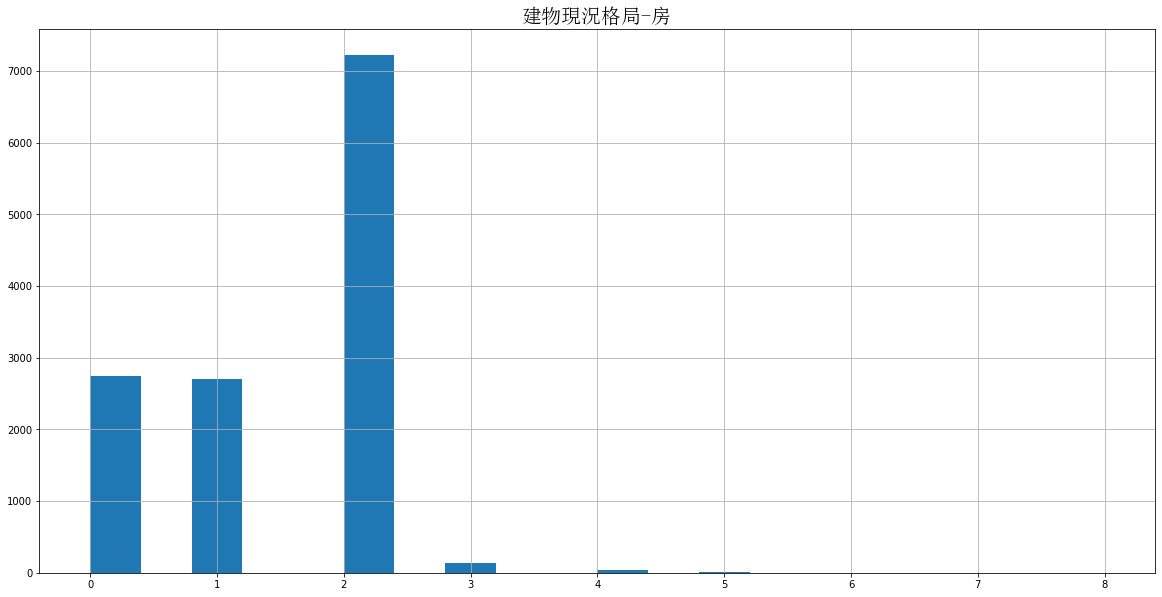

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

S1_106['建物現況格局-房'].hist(figsize=(20,10), bins=20) # bins為長條組數
plt.title('建物現況格局-房', fontproperties="SimSun", fontsize=20)
plt.show()

In [8]:
S1_106.corr()

""


### 合成一個csv